In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
col_names = ['user_id','item_id','rating','timestamp']

In [9]:
movie_df = pd.read_csv('u.data',sep='\t',names=col_names)

In [10]:
movie_df

user_id  item_id  rating  timestamp
0             0       50       5  881250949
1             0      172       5  881250949
2             0      133       1  881250949
3           196      242       3  881250949
4           186      302       3  891717742
...         ...      ...     ...        ...
99998       880      476       3  880175444
99999       716      204       5  879795543
100000      276     1090       1  874795795
100001       13      225       2  882399156
100002       12      203       3  879959583

[100003 rows x 4 columns]

In [11]:
#grab movie titles 

movie_titles = pd.read_csv('Movie_Id_Titles')

In [14]:
movie_titles.head()

item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)

In [26]:
movie_df = pd.merge(movie_df,movie_titles,on='item_id')

In [27]:
movie_df.head()

user_id  item_id  rating  timestamp             title
0        0       50       5  881250949  Star Wars (1977)
1      290       50       5  880473582  Star Wars (1977)
2       79       50       4  891271545  Star Wars (1977)
3        2       50       5  888552084  Star Wars (1977)
4        8       50       5  879362124  Star Wars (1977)

In [29]:
#Data viz of the best rated movies 
sns.set_style('darkgrid')

In [33]:
#average rating for top 5 rated movies
movie_df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [36]:
#movies with the most ratings 
movie_df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [37]:
ratings  = pd.DataFrame(movie_df.groupby('title')['rating'].mean())

In [38]:
ratings.head()

rating
title                              
'Til There Was You (1997)  2.333333
1-900 (1994)               2.600000
101 Dalmatians (1996)      2.908257
12 Angry Men (1957)        4.344000
187 (1997)                 3.024390

In [39]:
ratings['Number of ratings'] = movie_df.groupby('title')['rating'].count()

In [40]:
ratings.head()

rating  Number of ratings
title                                                 
'Til There Was You (1997)  2.333333                  9
1-900 (1994)               2.600000                  5
101 Dalmatians (1996)      2.908257                109
12 Angry Men (1957)        4.344000                125
187 (1997)                 3.024390                 41

<AxesSubplot:xlabel='Number of ratings', ylabel='Count'>

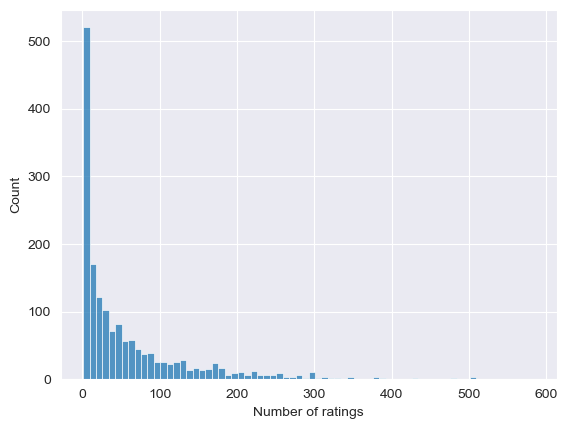

In [44]:
#Vizualize the dist of the number ratings 
sns.histplot(ratings['Number of ratings'],bins = 70)

- Seems like most movies have a rating of zero or one meaning that they may have not been watched

<AxesSubplot:xlabel='rating', ylabel='Count'>

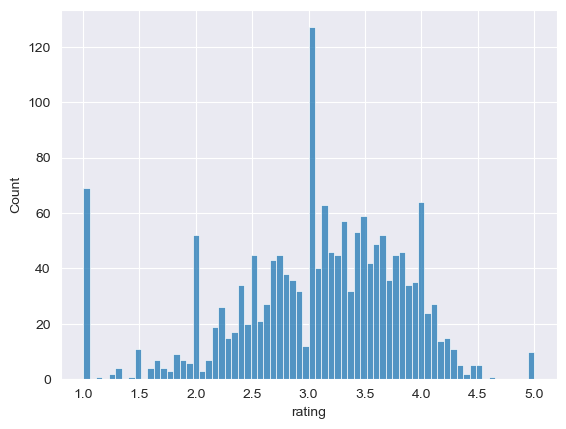

In [45]:
#Distribution of ratings 
sns.histplot(ratings['rating'],bins = 70)

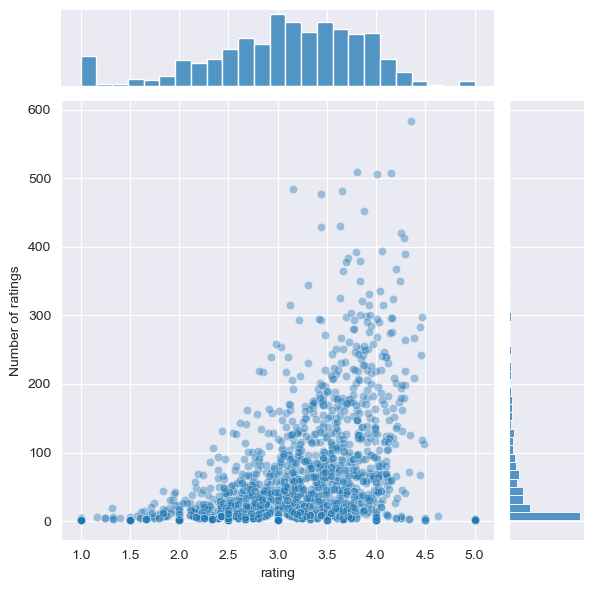

In [52]:
#view relationship btw number of ratings of a movie and average rating

sns.jointplot(y=ratings['Number of ratings'],x=ratings['rating'],alpha=0.4)

In [55]:
#Using pivot table to get the df into matrix 
movie_df.head()

user_id  item_id  rating  timestamp             title
0        0       50       5  881250949  Star Wars (1977)
1      290       50       5  880473582  Star Wars (1977)
2       79       50       4  891271545  Star Wars (1977)
3        2       50       5  888552084  Star Wars (1977)
4        8       50       5  879362124  Star Wars (1977)

In [57]:
moviemat = movie_df.pivot_table(index ='user_id',columns='title',values='rating')

In [58]:
moviemat.head()

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
0                        NaN         NaN                          NaN   
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
0                                        NaN                           NaN   
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

title    ...  Yankee Zulu (1994)  Year of the Horse (1997)  \
user_id  ...                                                 
0        ...                 NaN                       NaN   
1        ...                 NaN                       NaN   
2        ...                 NaN                       NaN   
3        ...                 NaN                       NaN   
4        ...                 NaN                       NaN   

title    You So Crazy (1994)  Young Frankenstein (1974)  Young Guns (1988)  \
user_id                                                                      
0                        NaN                        NaN                NaN   
1                        NaN                        5.0                3.0   
2                        NaN                        NaN                NaN   
3                        NaN                        NaN                NaN   
4                        NaN                        NaN                NaN   

title    Young Guns II (1990)  Young Poisoner's Handbook, The (1995)  \
user_id                                                                
0                         NaN                                    NaN   
1                         NaN                                    NaN   
2                         NaN                                    NaN   
3                         NaN                                    NaN   
4                         NaN                                    NaN   

title    Zeus and Roxanne (1997)  unknown  Á köldum klaka (Cold Fever) (1994)  
user_id                                                                        
0                            NaN      NaN                                 NaN  
1                            NaN      4.0                                 NaN  
2                            NaN      NaN                    

In [60]:
ratings.sort_values('Number of ratings',ascending=False).head(10)

rating  Number of ratings
title                                                     
Star Wars (1977)               4.359589                584
Contact (1997)                 3.803536                509
Fargo (1996)                   4.155512                508
Return of the Jedi (1983)      4.007890                507
Liar Liar (1997)               3.156701                485
English Patient, The (1996)    3.656965                481
Scream (1996)                  3.441423                478
Toy Story (1995)               3.878319                452
Air Force One (1997)           3.631090                431
Independence Day (ID4) (1996)  3.438228                429

In [61]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [62]:
#Now we want to see how similar the list of ratings of this one movie is to others by using
#a correlations 

#corrwith helps compute correlation matrices in more than 1 dataframe 

similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

/Users/obinnadinneya/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/obinnadinneya/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [64]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/Users/obinnadinneya/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/obinnadinneya/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [66]:
#Now we will clean this and make into a DF
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [67]:
corr_starwars.head()

Correlation
title                                 
'Til There Was You (1997)     0.872872
1-900 (1994)                 -0.645497
101 Dalmatians (1996)         0.211132
12 Angry Men (1957)           0.184289
187 (1997)                    0.027398

In [68]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

Correlation
title                                                          
Hollow Reed (1996)                                          1.0
Stripes (1981)                                              1.0
Beans of Egypt, Maine, The (1994)                           1.0
Safe Passage (1994)                                         1.0
Old Lady Who Walked in the Sea, The (Vieille qu...          1.0
Outlaw, The (1943)                                          1.0
Line King: Al Hirschfeld, The (1996)                        1.0
Hurricane Streets (1998)                                    1.0
Good Man in Africa, A (1994)                                1.0
Scarlet Letter, The (1926)                                  1.0

We see perfect correlation with some movies, makes no sense and this is as a result of those movies have very little number of ratings, solution would be to seta threshhold for movies with a specify number of ratings

In [69]:
corr_starwars = corr_starwars.join(ratings['Number of ratings'])

In [70]:
corr_starwars.head()

Correlation  Number of ratings
title                                                    
'Til There Was You (1997)     0.872872                  9
1-900 (1994)                 -0.645497                  5
101 Dalmatians (1996)         0.211132                109
12 Angry Men (1957)           0.184289                125
187 (1997)                    0.027398                 41

In [71]:
corr_starwars[corr_starwars['Number of ratings']>100].sort_values('Correlation',
                                                                  ascending=False).head()

Correlation  \
title                                                             
Star Wars (1977)                                       1.000000   
Empire Strikes Back, The (1980)                        0.748353   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Austin Powers: International Man of Mystery (1997)     0.377433   

                                                    Number of ratings  
title                                                                  
Star Wars (1977)                                                  584  
Empire Strikes Back, The (1980)                                   368  
Return of the Jedi (1983)                                         507  
Raiders of the Lost Ark (1981)                                    420  
Austin Powers: International Man of Mystery (1997)                130

In [72]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)

In [75]:
corr_liarliar

Correlation
title                                             
'Til There Was You (1997)                 0.118913
101 Dalmatians (1996)                     0.469765
12 Angry Men (1957)                       0.066272
187 (1997)                                0.175145
2 Days in the Valley (1996)               0.040739
...                                            ...
Young Guns (1988)                         0.410988
Young Guns II (1990)                      0.352174
Young Poisoner's Handbook, The (1995)     0.445016
Zeus and Roxanne (1997)                  -0.500000
unknown                                   0.870388

[1375 rows x 1 columns]

In [77]:
corr_liarliar=corr_liarliar.join(ratings['Number of ratings'])

In [80]:
corr_liarliar

Correlation  Number of ratings
title                                                                
'Til There Was You (1997)                 0.118913                  9
101 Dalmatians (1996)                     0.469765                109
12 Angry Men (1957)                       0.066272                125
187 (1997)                                0.175145                 41
2 Days in the Valley (1996)               0.040739                 93
...                                            ...                ...
Young Guns (1988)                         0.410988                101
Young Guns II (1990)                      0.352174                 44
Young Poisoner's Handbook, The (1995)     0.445016                 41
Zeus and Roxanne (1997)                  -0.500000                  6
unknown                                   0.870388                  9

[1375 rows x 2 columns]

In [81]:
corr_liarliar[corr_liarliar['Number of ratings']>100].sort_values('Correlation',
                                                                  ascending=False).head()

Correlation  Number of ratings
title                                                
Liar Liar (1997)          1.000000                485
Batman Forever (1995)     0.516968                114
Mask, The (1994)          0.484650                129
Down Periscope (1996)     0.472681                101
Con Air (1997)            0.469828                137